# Monte Carlo 

## Predicting Firm's future Gross Profits
- Gross Profit = Revenue - Cogs(Cost of Good Sold)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# All values in Millions
rev_mean = 170
rev_stdev = 20
iterations = 1000

In [4]:
rev = np.random.normal(rev_mean, rev_stdev, iterations)
rev

array([189.82587767, 170.63988171, 172.71304057, 178.60877041,
       170.19231923, 190.30829494, 164.07847398, 162.29512238,
       136.9297392 , 185.70521863, 174.54594844, 193.2136641 ,
       163.40793134, 183.58032196, 153.0492339 , 182.86955301,
       163.7045454 , 133.0139028 , 159.7136387 , 157.45334492,
       185.5556058 , 156.60944766, 154.25281286, 171.20571808,
       166.09829821, 148.35843307, 186.9815082 , 154.52392836,
       231.05092703, 180.80949802, 164.23935729, 190.2202471 ,
       167.42364598, 171.38340839, 174.89068416, 188.83174488,
       154.92030111, 182.82089915, 181.46390489, 134.5586031 ,
       161.93963715, 181.10837567, 141.48472936, 154.22166738,
       181.12591785, 175.1024343 , 137.52661318, 115.3579364 ,
       185.97418761, 124.21110282, 183.29350615, 153.89281167,
       204.1759262 , 156.66161626, 177.8344033 , 187.06126153,
       116.53680633, 172.75820393, 154.04397054, 163.9671434 ,
       192.58821278, 136.09308954, 169.7880845 , 129.07

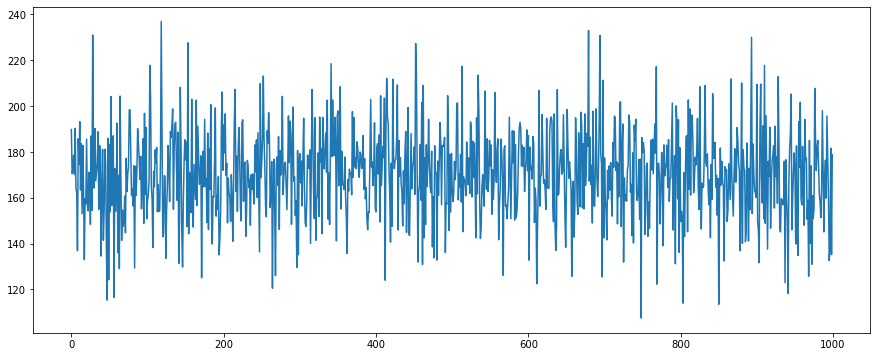

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

[]

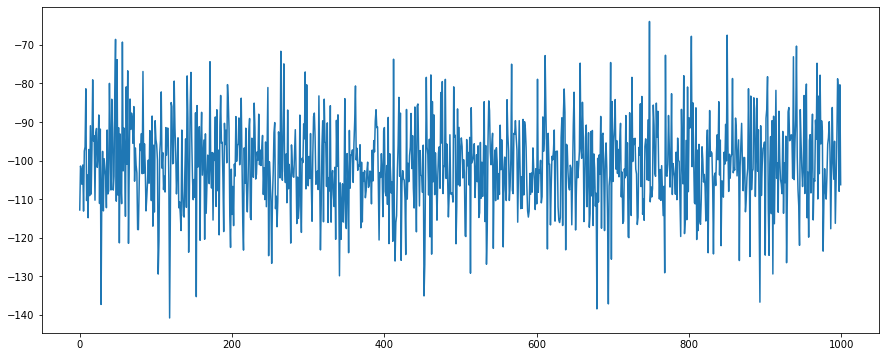

In [6]:
COGS = -(rev * np.random.normal(0.6, 0.1))
    
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.plot()

In [7]:
COGS.mean()

-101.22951618882968

In [8]:
COGS.std()

11.562605108343849

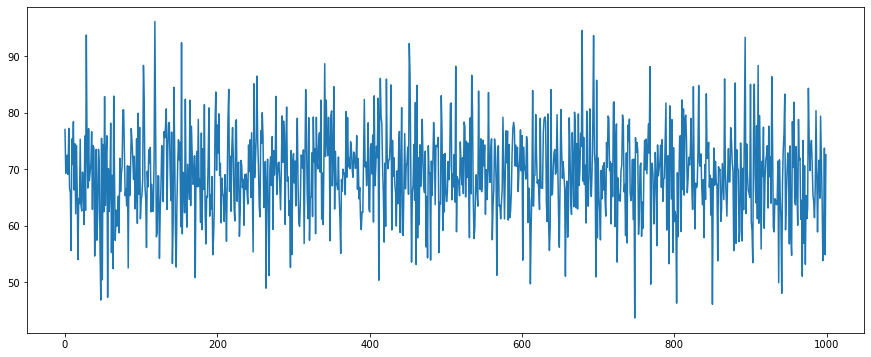

In [9]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [10]:
max(Gross_Profit)

96.1358751512702

In [11]:
min(Gross_Profit)

43.63035461338313

In [12]:
Gross_Profit.mean()

69.10626658252797

In [13]:
Gross_Profit.std()

7.893433665287853

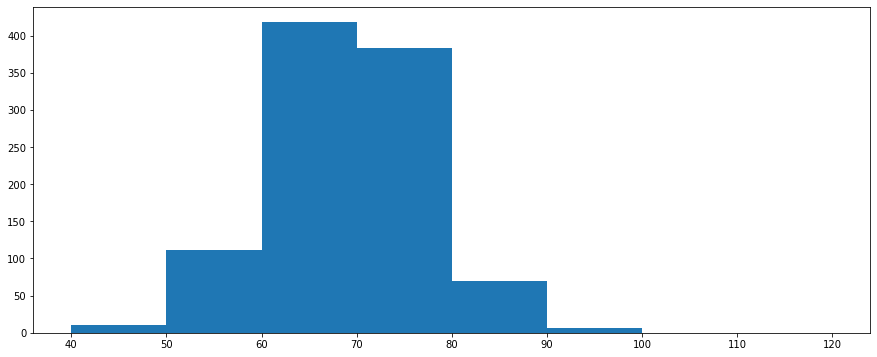

In [14]:
plt.figure(figsize=(15, 6))
plt.hist(Gross_Profit, bins=[40, 50, 60, 70, 80, 90, 100, 110, 120])
plt.show()

or

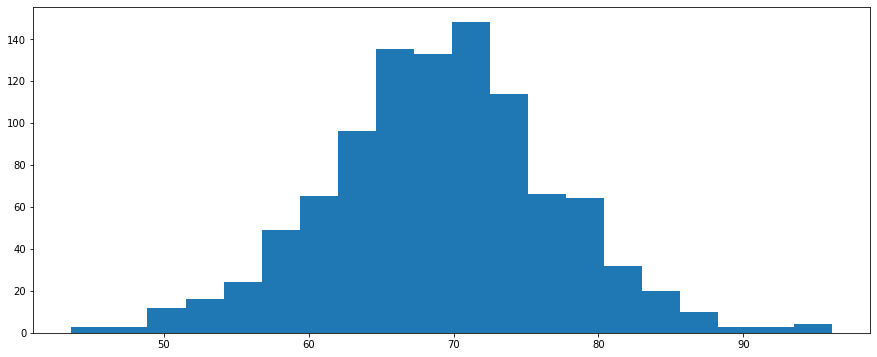

In [15]:
plt.figure(figsize=(15, 6))
plt.hist(Gross_Profit, bins=20)
plt.show()

## Predicting Stock Prices

Todays Price = Price Yesterday * e^r
- r = log return i.e ln(Today's price / yesterday's price)
- Using **Brownian motion** to model r
    - **Drift** - Direction rates of return have been in the past
    - u = avarage daily returns, var = variation 
$$
drift = u - \frac{1}{2} \cdot var
$$
    - **Volatility** - Random number = std * Z(Random variable from 0 to 1)

**Price Today** = Price Yesterday + e ^ (drift + std * Z)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfin
from scipy.stats import norm
%matplotlib inline

In [17]:
ticker = 'PG'
data = yfin.Ticker(ticker)
df = data.history(start="2007-1-1")["Close"]

df.head()

Date
2007-01-03 00:00:00-05:00    40.078510
2007-01-04 00:00:00-05:00    39.774212
2007-01-05 00:00:00-05:00    39.432693
2007-01-08 00:00:00-05:00    39.519623
2007-01-09 00:00:00-05:00    39.420254
Name: Close, dtype: float64

In [18]:
log_returns = np.log(1 + df.pct_change())

In [19]:
log_returns.tail()

Date
2023-05-26 00:00:00-04:00    0.000069
2023-05-30 00:00:00-04:00   -0.015386
2023-05-31 00:00:00-04:00   -0.004761
2023-06-01 00:00:00-04:00    0.010194
2023-06-02 00:00:00-04:00    0.017626
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

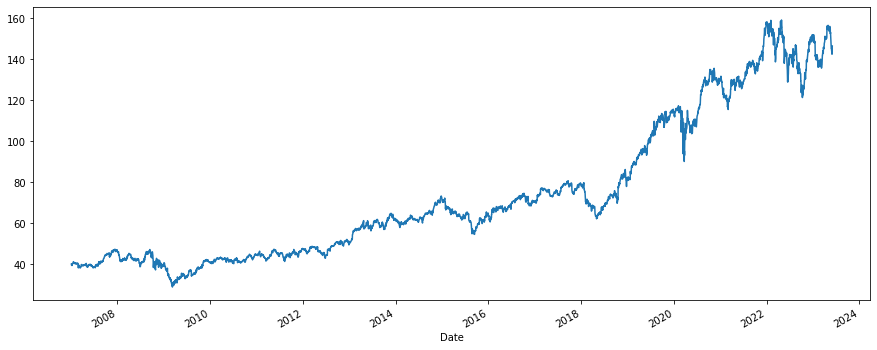

In [20]:
df.plot(figsize=(15, 6))

<AxesSubplot:xlabel='Date'>

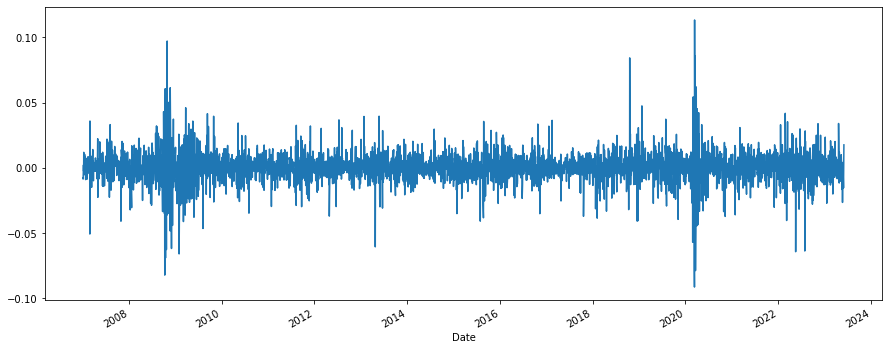

In [21]:
log_returns.plot(figsize=(15, 6))

In [22]:
# Calculating average daily returns
u = log_returns.mean()
u

0.0003137274151831194

In [23]:
# Calculating variance of daily return
var = log_returns.var()
var

0.00013953658904573837

$$
drift = u - \frac{1}{2} \cdot var
$$

Trying to predict PG daily price

In [24]:
drift = u - 0.5 * var
drift

0.0002439591206602502

In [25]:
stdev = log_returns.std()
stdev

0.011812560647282975

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$


z coresponds to the distance between mean and the event, experssed as the number of standerd devaition

In [26]:
# If a event has 95 % chance / probability of occuring, then it will be `norm.ppf(0.95)` std away from the mean
norm.ppf(0.95)

1.6448536269514722

In [27]:
# Creating a random (10,2) matrix for or random probabilities 
x = np.random.rand(10, 2)
x

array([[0.99903602, 0.87719346],
       [0.70291757, 0.18098011],
       [0.77498223, 0.10809166],
       [0.08823392, 0.80560553],
       [0.36792795, 0.57086715],
       [0.98249728, 0.08072084],
       [0.32232953, 0.35491369],
       [0.34831677, 0.37735741],
       [0.2604856 , 0.19060269],
       [0.27249337, 0.82996141]])

In [28]:
# Calculating distance from the mean expressed in form of std for the each corresponding probabilities in matrix x
z = norm.ppf(x)
z

array([[ 3.10110966,  1.16107086],
       [ 0.53281036, -0.91163628],
       [ 0.75535579, -1.23674079],
       [-1.35171085,  0.86181572],
       [-0.33734625,  0.17858229],
       [ 2.10829538, -1.40023929],
       [-0.4611945 , -0.37208792],
       [-0.38986884, -0.3124286 ],
       [-0.64184904, -0.87567751],
       [-0.60528936,  0.95401275]])

In [29]:
# Setting intervals 
t_intervals = 1000
iteration = 10

$$
daily\_returns = e^{r}
$$
$$
r = drift + stdev \cdot z
$$


In [30]:
daily_returns = np.exp(drift + stdev* norm.ppf(np.random.rand(t_intervals, iteration)))
daily_returns

array([[1.00639552, 0.99362335, 1.01236341, ..., 0.9960509 , 0.97622416,
        0.99847777],
       [0.99445845, 1.00585117, 0.96746975, ..., 0.98833036, 0.98849102,
        1.0114726 ],
       [0.99958095, 0.98947419, 1.00583943, ..., 1.00084751, 0.97584478,
        0.99942039],
       ...,
       [0.99489033, 0.98724555, 0.99691343, ..., 1.01602078, 1.00992285,
        1.00868333],
       [1.00273697, 1.01368979, 0.98946881, ..., 0.99151573, 0.99531652,
        1.01590563],
       [1.0075256 , 1.02463854, 0.99570716, ..., 0.99364601, 1.01916454,
        1.00872214]])

In [31]:
daily_returns.shape

(1000, 10)

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [34]:
# Last / Most recent price
S0 = df.iloc[-1]
S0

146.52000427246094

In [35]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
price_list.shape, daily_returns.shape

((1000, 10), (1000, 10))

In [38]:
# Assigning last price to the first row
price_list[0] = S0
price_list

array([[146.52000427, 146.52000427, 146.52000427, ..., 146.52000427,
        146.52000427, 146.52000427],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])


$$
S_{t} = S_{t-1} \mathbin{\cdot} daily\_return_{t}
$$


In [42]:
daily_returns

array([[1.00639552, 0.99362335, 1.01236341, ..., 0.9960509 , 0.97622416,
        0.99847777],
       [0.99445845, 1.00585117, 0.96746975, ..., 0.98833036, 0.98849102,
        1.0114726 ],
       [0.99958095, 0.98947419, 1.00583943, ..., 1.00084751, 0.97584478,
        0.99942039],
       ...,
       [0.99489033, 0.98724555, 0.99691343, ..., 1.01602078, 1.00992285,
        1.00868333],
       [1.00273697, 1.01368979, 0.98946881, ..., 0.99151573, 0.99531652,
        1.01590563],
       [1.0075256 , 1.02463854, 0.99570716, ..., 0.99364601, 1.01916454,
        1.00872214]])

In [39]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [40]:
price_list

array([[146.52000427, 146.52000427, 146.52000427, ..., 146.52000427,
        146.52000427, 146.52000427],
       [145.70805703, 147.37731753, 141.75367247, ..., 144.81016838,
        144.83370834, 148.20096948],
       [145.64699865, 145.82605221, 142.58143263, ..., 144.93289688,
        141.33521797, 148.11507008],
       ...,
       [132.69507041, 255.31540889,  96.82378355, ..., 254.42486066,
        161.05957002, 332.86150047],
       [133.05825324, 258.81062204,  95.80411349, ..., 252.26625193,
        160.30525061, 338.15587318],
       [134.05959682, 265.18733908,  95.39284157, ..., 250.66335543,
        163.37742714, 341.10531572]])

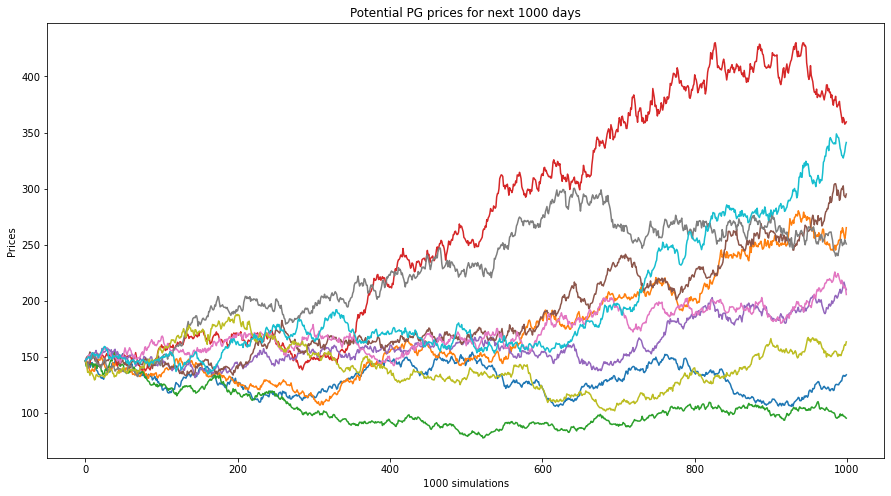

In [44]:
plt.figure(figsize=(15, 8))
plt.plot(price_list)
plt.xlabel("1000 simulations")
plt.ylabel("Prices")
plt.title("Potential PG prices for next 1000 days")
plt.show()

## Derivatives
- Derivative - Derivatives are financial contracts between 2 or more parties describing how and when they will exchange payments, they derive their value from an underlying asset or group of assets like stocks, bonds, interest rates, commodities, and exchange rates
    - **Forward contracts** - Two parties agree that one party sells an underlying asset to the other party at a future point in time, the price is set beforehand. This is a private negotiation and the contract is guaranteed to be settled
    - **Future contracts** - Highly standardized forward contracts, difference btw future and forward is that it is not a private negotiation and it is backed up by the institution and the transaction goes through the market place and counterparties do not know each other
    - **Swap contracts** - Two parties agree to exchange cash flows based on an underlying asset(interest rates, stock price, bond price) (ex-constant interest rates for variable interest rate and final exchange will be of the difference )
    - **Option contract** - A contract that gives the buyer the right but no obligation, to buy or to sell an underlying asset by a certain date(expiry/maturity date) and by a certain price (strike price)
        - Call options - option to buy an asset
        - Put options - option to sell an asset 


### The Black Scholes Fromula
- Calulates the value of the call by taking the differnce between the amount you get if you exercise the option minus the amount you have to pay of you exercise the option

$$
d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

$$
d_2 = d_1 - s \cdot \sqrt{t} = \frac{\ln(\frac{S}{K}) + (r - \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

In [1]:
import pandas as pd
import numpy as np
import yfinance as yfin
from scipy.stats import norm

In [2]:
def d1(S, J, r, stdev, T):
    return (np.log(S/K) + (r + stdev**2 / 2) * T) / (stdev * np.sqrt(T))
def d2(S, K, r, stdev, T):
    return (np.log(S/K) + (r - stdev**2 / 2) * T) / (stdev * np.sqrt(T))

In [3]:
# Cummulative probability
norm.cdf(0)

0.5

In [4]:
norm.cdf(0.25)

0.5987063256829237

In [5]:
norm.cdf(0.75)

0.7733726476231317

In [9]:
norm.cdf(9)

1.0

$$
\textbf{C} = SN(d_1) - Ke^{-rt}N(d_2) 
$$

In [30]:
def BSM(S, K, r, stedev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T)) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T))))

In [22]:
data = pd.DataFrame()
ticker = 'PG'
temp = yfin.Ticker(ticker)
data[ticker] = temp.history(start="2007-1-1", end="2017-3-21")["Close"]

In [23]:
S = data.iloc[-1]
S

PG    76.840683
Name: 2017-03-20 00:00:00-04:00, dtype: float64

In [24]:
log_returns = np.log(1 + data.pct_change())

In [25]:
stdev = log_returns.std() * 250** 0.5
stdev

PG    0.176584
dtype: float64

In [32]:
# risk free rate
r = 0.025
# Let's assume strike price is 110
K = 110.0
# time 1 year
T = 1

In [27]:
d1(S, K, r, stdev, T)

PG   -1.801717
dtype: float64

In [28]:
d2(S, K, r, stdev, T)

PG   -1.978302
dtype: float64

In [31]:
BSM(S, K, r, stdev, T)

PG    0.181339
Name: 2017-03-20 00:00:00-04:00, dtype: float64

## Euler Discretization 
- Monte Carlo simulations can provide us with thousands of possible cal option price
- We could average the payoff and discount it back it today
<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [49]:
import pandas as pd
import numpy as np
import yfinance as yfin
from scipy.stats import norm
import matplotlib.pyplot as plt

In [33]:
data = pd.DataFrame()
ticker = 'PG'
temp = yfin.Ticker(ticker)
data[ticker] = temp.history(start="2007-1-1", end="2017-3-21")["Close"]

In [34]:
r = 0.025

In [35]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176584
dtype: float64

In [36]:
type(stdev)

pandas.core.series.Series

In [37]:
stdev = stdev.values
stdev

array([0.17658436])

In [38]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [42]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [43]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])
    

In [46]:
S[:5]

array([[76.84068298, 76.84068298, 76.84068298, ..., 76.84068298,
        76.84068298, 76.84068298],
       [78.01905595, 77.22985665, 76.80162396, ..., 77.48806122,
        77.9367474 , 77.18488057],
       [78.38629612, 77.68709071, 75.75876756, ..., 77.54889117,
        78.22642286, 77.55483384],
       [77.42218324, 76.359417  , 74.48788703, ..., 78.37090605,
        77.306429  , 77.11442386],
       [76.07924459, 75.18260179, 75.70277221, ..., 78.02607837,
        77.06831422, 78.7444538 ]])

In [47]:
S.shape

(251, 10000)

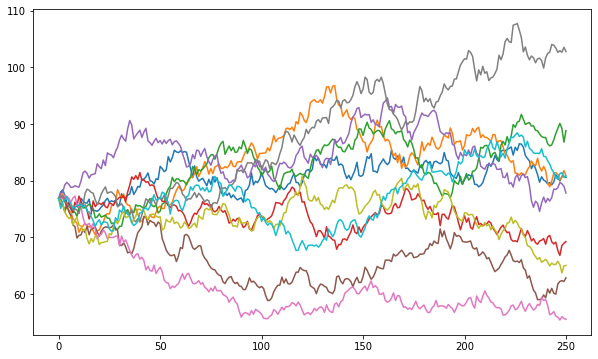

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

**Option contract** - A contract that gives the buyer the right but no obligation, to buy or to sell an underlying asset by a certain date(expiry/maturity date) and by a certain price (strike price)
        - Call options - option to buy an asset
        - Put options - option to sell an asset 
        
Call option
- Buy if S - K > 0
- Don't buy if S - K < 0
- S = Today Stock price
- K = Strike price

In [52]:
p = np.maximum(S[-1] - 110, 0)

In [53]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
p.shape

(10000,)

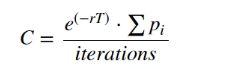

In [55]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.18663947823482543